## Lab 01. Poetry generation

Let's try to generate some poetry using RNNs. 

You have several choices here: 

* The Shakespeare sonnets, file `sonnets.txt` available in the notebook directory.

* Роман в стихах "Евгений Онегин" Александра Сергеевича Пушкина. В предобработанном виде доступен по [ссылке](https://github.com/attatrol/data_sources/blob/master/onegin.txt).

* Some other text source, if it will be approved by the course staff.

Text generation can be designed in several steps:
    
1. Data loading.
2. Dictionary generation.
3. Data preprocessing.
4. Model (neural network) training.
5. Text generation (model evaluation).


In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [2]:
import string
import os
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('dark_background')
%matplotlib inline

### Data loading: Shakespeare

Shakespeare sonnets are awailable at this [link](http://www.gutenberg.org/ebooks/1041?msg=welcome_stranger). In addition, they are stored in the same directory as this notebook (`sonnetes.txt`). Simple preprocessing is already done for you in the next cell: all technical info is dropped.

In [3]:
if not os.path.exists('sonnets.txt'):
    !wget https://raw.githubusercontent.com/girafe-ai/ml-mipt/master/homeworks_basic/Lab2_DL/sonnets.txt

with open('sonnets.txt', 'r') as iofile:
    text = iofile.readlines()
    
TEXT_START = 45
TEXT_END = -368
text = text[TEXT_START : TEXT_END]
assert len(text) == 2616

In opposite to the in-class practice, this time we want to predict complex text. Let's reduce the complexity of the task and lowercase all the symbols.

Now variable `text` is a list of strings. Join all the strings into one and lowercase it.

In [5]:
def processing_poetry(text: list, min_line_length=10) -> str:
    filter_text = []
    for line in text:
        is_number = False
        if len(line) > min_line_length:
            filter_text.append(line.strip() + ' \n')
    join_text = ' '.join(filter_text)
    return join_text.lower()

In [5]:
new_t = processing_poetry(text, min_line_length=0)
len(new_t)

100224

In [5]:
new_t

"from fairest creatures we desire increase, \n that thereby beauty's rose might never die, \n but as the riper should by time decease, \n his tender heir might bear his memory: \n but thou, contracted to thine own bright eyes, \n feed'st thy light's flame with self-substantial fuel, \n making a famine where abundance lies, \n thy self thy foe, to thy sweet self too cruel: \n thou that art now the world's fresh ornament, \n and only herald to the gaudy spring, \n within thine own bud buriest thy content, \n and tender churl mak'st waste in niggarding: \n pity the world, or else this glutton be, \n to eat the world's due, by the grave and thee. \n  \n ii \n  \n when forty winters shall besiege thy brow, \n and dig deep trenches in thy beauty's field, \n thy youth's proud livery so gazed on now, \n will be a tatter'd weed of small worth held: \n then being asked, where all thy beauty lies, \n where all the treasure of thy lusty days; \n to say, within thine own deep sunken eyes, \n were a

In [6]:
# Join all the strings into one and lowercase it
# Put result into variable text.

text = processing_poetry(text, min_line_length=0)

assert len(text) == 100224, 'Are you sure you have concatenated all the strings?'
assert not any([x in set(text) for x in string.ascii_uppercase]), 'Uppercase letters are present'
print('OK!')

OK!


### Data loading: "Евгений Онегин"


In [54]:
!wget https://raw.githubusercontent.com/attatrol/data_sources/master/onegin.txt
    
with open('onegin.txt', 'r') as iofile:
    raw_text = iofile.readlines()

raw_text = [x.replace('\t\t', '') for x in raw_text]
proc_text = processing_poetry(raw_text, min_line_length=0)

--2021-04-27 22:16:50--  https://raw.githubusercontent.com/attatrol/data_sources/master/onegin.txt
Распознаётся raw.githubusercontent.com (raw.githubusercontent.com)… 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Подключение к raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... соединение установлено.
HTTP-запрос отправлен. Ожидание ответа… 200 OK
Длина: 262521 (256K) [text/plain]
Сохранение в: «onegin.txt.8»

onegin.txt.8        100%[===================>] 256,37K  --.-KB/s    за 0,1s    

2021-04-27 22:16:51 (2,03 MB/s) - «onegin.txt.8» сохранён [262521/262521]



In opposite to the in-class practice, this time we want to predict complex text. Let's reduce the complexity of the task and lowercase all the symbols.

Now variable `text` is a list of strings. Join all the strings into one and lowercase it.

In [55]:
print(proc_text)

 
 i 
  
 «мой дядя самых честных правил, 
 когда не в шутку занемог, 
 он уважать себя заставил 
 и лучше выдумать не мог. 
 его пример другим наука; 
 но, боже мой, какая скука 
 с больным сидеть и день и ночь, 
 не отходя ни шагу прочь! 
 какое низкое коварство 
 полуживого забавлять, 
 ему подушки поправлять, 
 печально подносить лекарство, 
 вздыхать и думать про себя: 
 когда же черт возьмет тебя!» 
  
  
  
 ii 
  
 так думал молодой повеса, 
 летя в пыли на почтовых, 
 всевышней волею зевеса 
 наследник всех своих родных. — 
 друзья людмилы и руслана! 
 с героем моего романа 
 без предисловий, сей же час 
 позвольте познакомить вас: 
 онегин, добрый мой приятель, 
 родился на брегах невы, 
 где, может быть, родились вы 
 или блистали, мой читатель; 
 там некогда гулял и я: 
 но вреден север для меня 
  
  
 iii 
  
 служив отлично-благородно, 
 долгами жил его отец, 
 давал три бала ежегодно 
 и промотался наконец. 
 судьба евгения хранила: 
 сперва madame за ним ходила, 
 пото

In [77]:
row_text = proc_text.split('\n')
clear_text = []
for row in row_text:
    if len(row) < 10:
        continue
    clear_text.append(row.strip())
clear_text = '\n'.join(clear_text)
text = processing_poetry(clear_text, min_line_length=0)

In [78]:
clear_text[:40]

'«мой дядя самых честных правил,\nкогда не'

In [93]:
clear_text

'«мой дядя самых честных правил,\nкогда не в шутку занемог,\nон уважать себя заставил\nи лучше выдумать не мог.\nего пример другим наука;\nно, боже мой, какая скука\nс больным сидеть и день и ночь,\nне отходя ни шагу прочь!\nкакое низкое коварство\nполуживого забавлять,\nему подушки поправлять,\nпечально подносить лекарство,\nвздыхать и думать про себя:\nкогда же черт возьмет тебя!»\nтак думал молодой повеса,\nлетя в пыли на почтовых,\nвсевышней волею зевеса\nнаследник всех своих родных. —\nдрузья людмилы и руслана!\nс героем моего романа\nбез предисловий, сей же час\nпозвольте познакомить вас:\nонегин, добрый мой приятель,\nродился на брегах невы,\nгде, может быть, родились вы\nили блистали, мой читатель;\nтам некогда гулял и я:\nно вреден север для меня\nслужив отлично-благородно,\nдолгами жил его отец,\nдавал три бала ежегодно\nи промотался наконец.\nсудьба евгения хранила:\nсперва madame за ним ходила,\nпотом monsieur ее сменил;\nребенок был резов, но мил.\nmonsieur l’abbe€, францу

Put all the characters, that you've seen in the text, into variable `tokens`.

In [94]:
tokens = sorted(set(clear_text))

Create dictionary `token_to_idx = {<char>: <index>}` and dictionary `idx_to_token = {<index>: <char>}`

In [95]:
len(tokens)

83

In [96]:
token_to_idx = dict()
idx_to_token = dict()
for char in tokens:
    token_to_idx[char] = len(token_to_idx)
    idx_to_token[len(token_to_idx) - 1] = char

In [92]:
idx_to_token

{0: '\n',
 1: ' ',
 2: '!',
 3: '(',
 4: ')',
 5: ',',
 6: '-',
 7: '.',
 8: '5',
 9: '7',
 10: '8',
 11: '9',
 12: ':',
 13: ';',
 14: '?',
 15: '[',
 16: ']',
 17: '^',
 18: 'a',
 19: 'b',
 20: 'c',
 21: 'd',
 22: 'e',
 23: 'f',
 24: 'g',
 25: 'h',
 26: 'i',
 27: 'k',
 28: 'l',
 29: 'm',
 30: 'n',
 31: 'o',
 32: 'p',
 33: 'q',
 34: 'r',
 35: 's',
 36: 't',
 37: 'u',
 38: 'v',
 39: 'w',
 40: 'x',
 41: 'y',
 42: 'z',
 43: '«',
 44: '»',
 45: 'а',
 46: 'б',
 47: 'в',
 48: 'г',
 49: 'д',
 50: 'е',
 51: 'ж',
 52: 'з',
 53: 'и',
 54: 'й',
 55: 'к',
 56: 'л',
 57: 'м',
 58: 'н',
 59: 'о',
 60: 'п',
 61: 'р',
 62: 'с',
 63: 'т',
 64: 'у',
 65: 'ф',
 66: 'х',
 67: 'ц',
 68: 'ч',
 69: 'ш',
 70: 'щ',
 71: 'ъ',
 72: 'ы',
 73: 'ь',
 74: 'э',
 75: 'ю',
 76: 'я',
 77: 'ё',
 78: '–',
 79: '—',
 80: '’',
 81: '…',
 82: '€'}

In [228]:
token_to_idx

{'\n': 0,
 ' ': 1,
 '!': 2,
 "'": 3,
 '(': 4,
 ')': 5,
 ',': 6,
 '-': 7,
 '.': 8,
 ':': 9,
 ';': 10,
 '?': 11,
 'a': 12,
 'b': 13,
 'c': 14,
 'd': 15,
 'e': 16,
 'f': 17,
 'g': 18,
 'h': 19,
 'i': 20,
 'j': 21,
 'k': 22,
 'l': 23,
 'm': 24,
 'n': 25,
 'o': 26,
 'p': 27,
 'q': 28,
 'r': 29,
 's': 30,
 't': 31,
 'u': 32,
 'v': 33,
 'w': 34,
 'x': 35,
 'y': 36,
 'z': 37}

*Comment: in this task we have only 38 different tokens, so let's use one-hot encoding.*

In [61]:
def split_to_matrix(text, max_len=512, pad=token_to_idx[' '], dtype='int32', batch_first = True):
    """Casts a list of names into rnn-digestable matrix"""
    
    residual = len(text) % max_len
    emb_text = [token_to_idx[c] for c in text]
    res_list = [pad for _ in range(max_len - residual)]
    text_split = np.array(emb_text + res_list)
    num_examp = (len(text) - residual + max_len) // max_len
    text_split = text_split.reshape((num_examp, max_len))
    
    if not batch_first: # convert [batch, time] into [time, batch]
        text_split = np.transpose(text_split)
    
#     text_out = []
#     for row in text_split:
#         text_out.append(list(row))
    return text_split

In [97]:
text_tensor = split_to_matrix(clear_text, max_len=200)

### Building the model

Now we want to build and train recurrent neural net which would be able to something similar to Shakespeare's poetry.

Let's use vanilla RNN, similar to the one created during the lesson.

In [63]:
import torch, torch.nn as nn
import torch.nn.functional as F

In [98]:
class CharRNNCell(nn.Module):
    """
    Implement the scheme above as torch module
    """
    def __init__(self, num_tokens=len(tokens), embedding_size=32, rnn_num_units=64):
        super(self.__class__,self).__init__()
        self.num_units = rnn_num_units
        
        self.embedding = nn.Embedding(num_tokens, embedding_size)
        self.rnn_update = nn.Linear(embedding_size + rnn_num_units, rnn_num_units)
        self.rnn_to_logits = nn.Linear(rnn_num_units, num_tokens)
        
    def forward(self, x, h_prev):
        """
        This method computes h_next(x, h_prev) and log P(x_next | h_next)
        We'll call it repeatedly to produce the whole sequence.
        
        :param x: batch of character ids, containing vector of int64
        :param h_prev: previous rnn hidden states, containing matrix [batch, rnn_num_units] of float32
        """
        # get vector embedding of x
        x_emb = self.embedding(x)
        
        # compute next hidden state using self.rnn_update
        # hint: use torch.cat(..., dim=...) for concatenation
        x_and_h = torch.cat([x_emb, h_prev], dim=-1)
        h_next = self.rnn_update(x_and_h)
        
        h_next = torch.tanh(h_next)
        
        assert h_next.size() == h_prev.size()
        
        #compute logits for next character probs
        logits = self.rnn_to_logits(h_next)
        
        return h_next, F.log_softmax(logits, -1)
    
    def initial_state(self, batch_size):
        """ return rnn state before it processes first input (aka h0) """
        return torch.zeros(batch_size, self.num_units, requires_grad=True)

In [99]:
from IPython.display import clear_output
from random import sample

num_tokens = len(tokens)
char_rnn = CharRNNCell()
criterion = nn.NLLLoss()
opt = torch.optim.Adam(char_rnn.parameters())
history = []

In [100]:
def rnn_loop(char_rnn, batch_ix):
    """
    Computes log P(next_character) for all time-steps in names_ix
    :param names_ix: an int32 matrix of shape [batch, time], output of to_matrix(names)
    """
    batch_size, max_length = batch_ix.size()
    hid_state = char_rnn.initial_state(batch_size)
    logprobs = []

    for x_t in batch_ix.transpose(0,1):
        hid_state, logp_next = char_rnn(x_t, hid_state)  # <-- here we call your one-step code
        logprobs.append(logp_next)
        
    return torch.stack(logprobs, dim=1)

In [85]:
 batch_ix = sample(list(text_tensor), 32)

In [91]:
batch_ix

tensor([[ 0,  1, 56,  ...,  1,  0,  1],
        [ 0,  1,  1,  ..., 50,  1,  0],
        [59,  1,  0,  ...,  0,  1, 59],
        ...,
        [ 0,  1, 76,  ..., 46,  1,  0],
        [ 1, 48,  1,  ...,  0,  1, 47],
        [ 1, 53,  1,  ...,  1,  1,  0]])

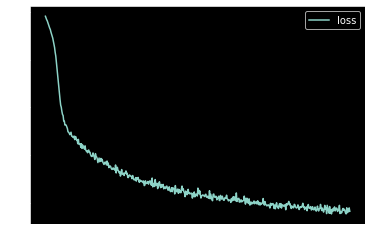

In [101]:
for i in range(500):
    batch_ix = sample(list(text_tensor), 32)
    batch_ix = torch.tensor(batch_ix, dtype=torch.int64)
    
    logp_seq = rnn_loop(char_rnn, batch_ix)
    
    # compute loss
    predictions_logp = logp_seq[:, :-1]
    actual_next_tokens = batch_ix[:, 1:]

    loss = criterion(predictions_logp.contiguous().view(-1, num_tokens), 
                  actual_next_tokens.contiguous().view(-1))
    
    # train with backprop
    loss.backward()
    opt.step()
    opt.zero_grad()
    
    history.append(loss.data.numpy())
    if (i+1)%100==0:
        clear_output(True)
        plt.plot(history,label='loss')
        plt.legend()
        plt.show()

assert np.mean(history[:10]) > np.mean(history[-10:]), "RNN didn't converge."

Plot the loss function (axis X: number of epochs, axis Y: loss function).

In [102]:
def generate_sample(char_rnn, seed_phrase=' ', max_length=64, temperature=1.0):
    '''
    The function generates text given a phrase of length at least SEQ_LENGTH.
    :param seed_phrase: prefix characters. The RNN is asked to continue the phrase
    :param max_length: maximum output length, including seed_phrase
    :param temperature: coefficient for sampling.  higher temperature produces more chaotic outputs,
                        smaller temperature converges to the single most likely output
    '''
    
    x_sequence = [token_to_idx[token] for token in seed_phrase]
    x_sequence = torch.tensor([x_sequence], dtype=torch.int64)
    hid_state = char_rnn.initial_state(batch_size=1)
    
    #feed the seed phrase, if any
    for i in range(len(seed_phrase) - 1):
        hid_state, _ = char_rnn(x_sequence[:, i], hid_state)
    
    #start generating
    for _ in range(max_length - len(seed_phrase)):
        hid_state, logp_next = char_rnn(x_sequence[:, -1], hid_state)
        p_next = F.softmax(logp_next / temperature, dim=-1).data.numpy()[0]
        
        # sample next token and push it back into x_sequence
        next_ix = np.random.choice(num_tokens,p=p_next)
        next_ix = torch.tensor([[next_ix]], dtype=torch.int64)
        x_sequence = torch.cat([x_sequence, next_ix], dim=1)
        
    return ''.join([idx_to_token[ix] for ix in x_sequence.data.numpy()[0]])

In [129]:
LENGTH = 500
temp = [0.1, 0.2, 0.5, 1.0, 2.0]
SEED_PHRASE = 'мой дядя самых честных правил '
for t in temp:
    print(f'Генерация стизов для temperature = {t}')
    print(generate_sample(char_rnn, seed_phrase=SEED_PHRASE, temperature=t, max_length=LENGTH))
    print()

Генерация стизов для temperature = 0.1
мой дядя самых честных правил на столова стольный поровой поровет верень в серень он он он серень он он не поровой поровой половый серень он он не стольный половой порого в сторов он он серень волони в серень поровой поровой столь он он в серень подовой верень в серень поровой столь он он он он он не в серень не серень он он он он он он он не столь он он не полов он он он он он он он он он он он он серень верень в то воловой порень в серень в серень в серень в серень в серень половой серень в ст

Генерация стизов для temperature = 0.2
мой дядя самых честных правил на стравень востом но в сераль во в серень на стольный дать серань он серона серень не своленье постом сереть подна поровой не столовой подовой довет в задет воловаль серовет он серенень и сторов и пороть поровет порет на он и порать поратья сторовой серань,
он он не половый в не подеть он не сторов не в не сток он он он подоль воло подень в сторовой продом вердень он серень он деровный 

Видно, что с ростом температуры выбор следующих литтер все более слчайный. При этом смысла не очень много, а низкая температура не схраняет структуру стихотворения 

### More poetic model

Let's use LSTM instead of vanilla RNN and compare the results.

Plot the loss function of the number of epochs. Does the final loss become better?

In [105]:
class customLSTM(nn.Module):
    def __init__(self, num_tokens=len(token_to_idx), emb_size=32, rnn_num_units=64):
        super(self.__class__, self).__init__()
        self.emb = nn.Embedding(num_tokens, emb_size)
        self.rnn = nn.LSTM(emb_size, rnn_num_units, batch_first=True, num_layers=3, dropout=0.2)
        self.hid_to_logits = nn.Linear(rnn_num_units, num_tokens)
        
    def forward(self, x):
        assert isinstance(x.data, torch.LongTensor)
        h_seq, _ = self.rnn(self.emb(x))
        next_logits = self.hid_to_logits(h_seq)
        next_logp = F.log_softmax(next_logits, dim=-1)
        return next_logp

In [ ]:
model = customLSTM()

In [118]:
EPOCHS = 500
BATCH_SIZE = 64
opt = torch.optim.Adam(model.parameters())
sheduler = torch.optim.lr_scheduler.OneCycleLR(opt, max_lr=0.1, steps_per_epoch=BATCH_SIZE, epochs=EPOCHS)
history = []
criterion = nn.NLLLoss()

# the model applies over the whole sequence


In [119]:
text_tensor = split_to_matrix(clear_text, max_len=256)

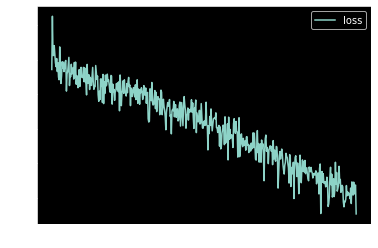

customLSTM(
  (emb): Embedding(83, 32)
  (rnn): LSTM(32, 64, num_layers=3, batch_first=True, dropout=0.2)
  (hid_to_logits): Linear(in_features=64, out_features=83, bias=True)
)

In [120]:
MAX_LENGTH = 20
model.train()
for i in range(EPOCHS):
    opt.zero_grad()

    batch_ix = sample(list(text_tensor), BATCH_SIZE)
    batch_ix = torch.tensor(batch_ix, dtype=torch.int64)
    
#     batch_ix = batch_ix.transpose(1,0)
    logp_seq = model(batch_ix)

    # compute loss
    predictions_logp = logp_seq[:, :-1]
    actual_next_tokens = batch_ix[:, 1:]
    loss = criterion(predictions_logp.contiguous().view(-1, num_tokens), 
                  actual_next_tokens.contiguous().view(-1))

    # train with backprop
    loss.backward()
    opt.step()
    sheduler.step()

    history.append(loss.data.numpy())
    if (i+1)%100==0:
        clear_output(True)
        plt.plot(history,label='loss')
        plt.legend()
        plt.show()

assert np.mean(history[:10]) > np.mean(history[-10:]), "RNN didn't converge."
model.eval()

Generate text using the trained net with different `temperature` parameter: `[0.1, 0.2, 0.5, 1.0, 2.0]`.

Evaluate the results visually, try to interpret them.

In [108]:
def generate_sample_lstm(model, seed_phrase='<', max_length=MAX_LENGTH, temperature=0.3):
    '''
    The function generates text given a phrase of length at least SEQ_LENGTH.
    :param seed_phrase: prefix characters. The RNN is asked to continue the phrase
    :param max_length: maximum output length, including seed_phrase
    :param temperature: coefficient for sampling.  higher temperature produces more chaotic outputs,
                        smaller temperature converges to the single most likely output
    '''
    
    x_sequence = [token_to_idx[token] for token in seed_phrase]
#     print(x_sequence)
    x_sequence = torch.tensor([x_sequence], dtype=torch.int64)
#     print(x_sequence)
    for _ in range(max_length - len(seed_phrase)):
        logp_next = model(x_sequence)[0][-1]
        p_next = F.softmax(logp_next / temperature, dim=-1).data.numpy()
        
        # sample next token and push it back into x_sequence
        next_ix = np.random.choice(num_tokens,p=p_next)
        next_ix = torch.tensor([[next_ix]], dtype=torch.int64)
        x_sequence = torch.cat([x_sequence, next_ix], dim=1)
#         print(x_sequence)
#     return x_sequence
    name_id = []
    for ix in x_sequence.data.numpy()[0]:
        name_id.append(idx_to_token[ix])
        
    return ''.join(name_id)

In [125]:
LENGTH = 500
temp = [0.1, 0.2, 0.5, 1.0, 2.0]
SEED_PHRASE = 'мой дядя самых честных правил '
for t in temp:
    print(f'Генерация стизов для temperature = {t}')
    print(generate_sample_lstm(model, seed_phrase=SEED_PHRASE, temperature=t, max_length=LENGTH))
    print()

Генерация стизов для temperature = 0.1
мой дядя самых честных правил вотой
и свое страдит света страгой
странить в серда в соседи страдит,
и в не своей страстью страстей,
и страста страсти своей
в не страдит с него страненье,
и страдит свети страдит,
и в содно в постра странный страдно
он в него странный страдит,
и в сердет поров содовал,
и постран с него в соседа
и в не страдит с него страна
страдит не в серда стравой
не страдит свет серда страдит,
не в не страстью светили в серда,
и в соседи страстью страда,
и в он не в него не все

Генерация стизов для temperature = 0.2
мой дядя самых честных правил дать,
и в на содил и в на с ней,
и страдит старовой всё в друг,
всё и постренный страдит,
и в сердет и всё раздала,
и в сердет порой порой
всё поровой не всё страна
и страгали следит,
и стара с него стара,
и моловой стресть он страстья,
и с него в он он из не всё в он в доло,
был и странной серда постал,
в сердит он половать с него стражет,
и в серда столо не в и стара,
и с него постали 

Из поулчаемых тексто получается, что чем ниже температура, тем больше заметно влияние прещсказания LSTM, поскльку сохраняется фонетическая структура языка, генерируемые "слова" похожи на слова

### Saving and loading models

Save the model to the disk, then load it and generate text. Examples are available [here](https://pytorch.org/tutorials/beginner/saving_loading_models.html]).

In [127]:
SAVE_PATH = 'neural_onegin_lstm'

In [122]:
torch.save(model, SAVE_PATH)

In [128]:
res_model = customLSTM()
res_model=(torch.load(SAVE_PATH))
res_model.eval()

customLSTM(
  (emb): Embedding(83, 32)
  (rnn): LSTM(32, 64, num_layers=3, batch_first=True, dropout=0.2)
  (hid_to_logits): Linear(in_features=64, out_features=83, bias=True)
)

### References
1. <a href='http://karpathy.github.io/2015/05/21/rnn-effectiveness/'> Andrew Karpathy blog post about RNN. </a> 
There are several examples of genration: Shakespeare texts, Latex formulas, Linux Sourse Code and children names.
2. <a href='https://github.com/karpathy/char-rnn'> Repo with char-rnn code </a>
3. Cool repo with PyTorch examples: [link](https://github.com/spro/practical-pytorch`)